In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv('/content/lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


**EDA**

<Axes: xlabel='SMOKING', ylabel='count'>

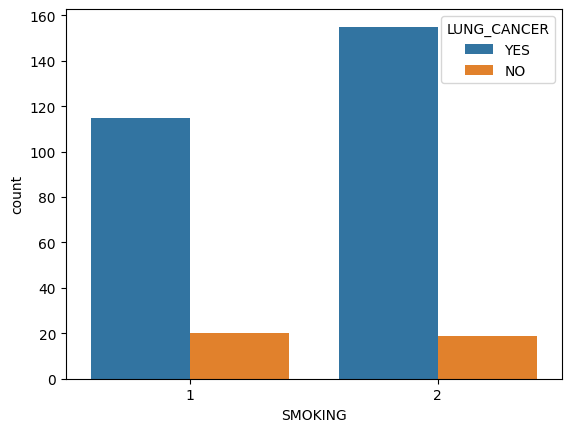

In [36]:
sns.countplot(df,hue='LUNG_CANCER',x='SMOKING')

([<matplotlib.patches.Wedge at 0x7a4b47d94310>,
 [Text(-1.0146551725268897, 0.42482335254129766, '1'),
  Text(1.0146553109518546, -0.42482302192465465, '2')],
 [Text(-0.553448275923758, 0.2317218286588896, '87.4%'),
  Text(0.5534483514282842, -0.2317216483225389, '12.6%')])

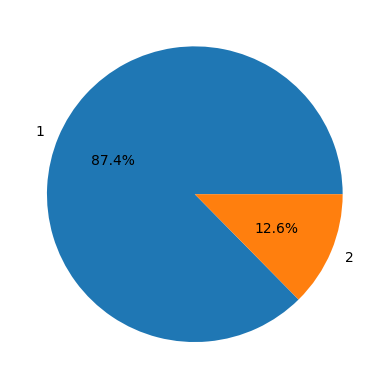

In [14]:
plt.pie(df['LUNG_CANCER'].value_counts(),labels=['YES',"NO"],radius=1,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7a4b450a6dd0>,
 [Text(-0.2166555797947403, 1.0784527619436122, 'SMOKERS'),
  Text(0.2166558026376618, -1.0784527171755982, 'NON-SMOKERS')],
 [Text(-0.11817577079713106, 0.588246961060152, '56.3%'),
  Text(0.1181758923478155, -0.5882469366412353, '43.7%')])

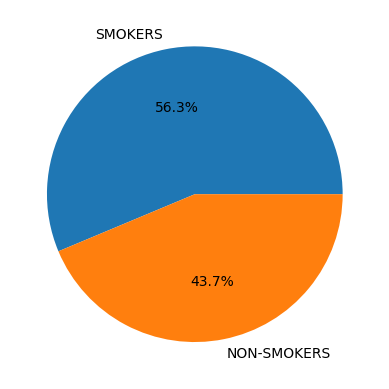

In [17]:
plt.pie(df['SMOKING'].value_counts(),labels=['SMOKERS','NON-SMOKERS'],radius=1,autopct='%1.1f%%')

In [37]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [38]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [40]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [42]:
l_encoder=LabelEncoder()
df['GENDER']=l_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER']=l_encoder.fit_transform(df['LUNG_CANCER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [43]:
X=df.drop('LUNG_CANCER',axis=1)
y=df['LUNG_CANCER']

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [46]:
modelsvm=SVC(kernel='linear')
modelsvm.fit(X_train,y_train)

SVC(kernel='linear')

In [47]:
y_predict=modelsvm.predict(X_test)

In [50]:
accuracy1=accuracy_score(y_test,y_predict)
print('Accuracy:',accuracy1)
print('Confusion MATRIX:\n',confusion_matrix(y_test,y_predict))
print('Classification Report:\n',classification_report(y_test,y_predict))

Accuracy: 0.9047619047619048
Confusion MATRIX:
 [[ 6  3]
 [ 1 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.91      0.97      0.94        33

    accuracy                           0.90        42
   macro avg       0.89      0.82      0.85        42
weighted avg       0.90      0.90      0.90        42



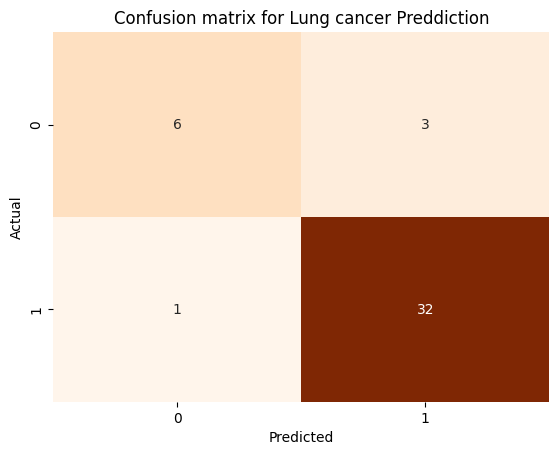

In [63]:
sns.heatmap(confusion_matrix(y_test,y_predict),cmap='Oranges',annot=True,fmt='d',cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for Lung cancer Preddiction')

plt.show()
